In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import regularizers

In [6]:
full_pant = np.loadtxt('../data/pantheon.txt',skiprows=1, usecols=[1,4])
full_cov = np.loadtxt('../data/pantheon_errors.txt',skiprows=1).reshape((1048,1048))
bin_pant = np.loadtxt('../data/binned_pantheon_15.txt',skiprows=2)
bin_cov = np.loadtxt('../data/binned_cov_pantheon_15.txt',skiprows=1).reshape((15,15))

np.shape(full_pant), np.shape(full_cov), np.shape(bin_pant), np.shape(bin_cov)

((1048, 2), (1048, 1048), (15, 2), (15, 15))

In [177]:
pd.DataFrame(np.sort(full_pant, axis=0)).head(1044)
# np.min(full_pant[:,0])

,0,1
0,0.01012,13.90745
1,0.01038,13.92480
2,0.01043,13.97910
3,0.01082,14.00860
4,0.01209,14.04960
...,...,...
1039,1.34000,25.54235
1040,1.37000,25.60340
1041,1.39000,25.73935
1042,1.54000,25.90720


In [103]:
pd.DataFrame(bin_pant)

,0,1
0,0.014353,14.67655
1,0.020602,15.43421
2,0.029571,16.30360
3,0.042444,17.05419
4,0.060921,17.86946
5,0.087442,18.80098
6,0.125509,19.60783
7,0.180147,20.44856
8,0.258571,21.31148
9,0.371137,22.25380


<AxesSubplot:>

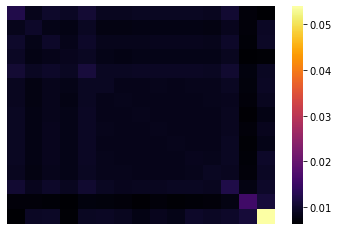

In [104]:
sns.heatmap(pd.DataFrame(bin_cov), annot=False, fmt='g', xticklabels=False, yticklabels=False, 
            cmap = 'inferno')

In [185]:
choice1 = np.random.randint(0,200,4)
print(choice1)
choice2 = np.random.randint(201,800,5)
print(choice2)
choice3 = np.random.randint(801,1046,4)
print(choice3)
choice = np.sort(np.concatenate([np.array([2]), choice1, choice2, choice3, np.array([1047])]))
# choice = np.array([2, 47, 89, 142, 175, 200, 250, 365, 549,745, 855, 955,1030, 1043, 1047])
print(choice)

[  2 186  43 198]
[491 372 535 379 647]
[ 915  895  994 1032]
[   2    2   43  186  198  372  379  491  535  647  895  915  994 1032
 1047]


In [186]:
full_pant[choice]

array([[ 0.6782 , 24.0377 ],
       [ 0.6782 , 24.0377 ],
       [ 0.8104 , 24.0795 ],
       [ 0.73516, 24.02845],
       [ 0.71538, 23.84395],
       [ 0.19726, 20.4352 ],
       [ 0.20453, 20.66435],
       [ 0.2607 , 21.31275],
       [ 0.13639, 19.58645],
       [ 0.03408, 16.39975],
       [ 0.2196 , 20.83145],
       [ 0.3666 , 21.88675],
       [ 0.3254 , 21.91925],
       [ 1.02   , 24.88235],
       [ 1.092  , 24.63835]])

In [187]:
cov_mini = np.zeros((15, 15))
np.shape(cov_mini)

(15, 15)

In [188]:
for i, id1 in enumerate(choice):
    for j, id2 in enumerate(choice):
        cov_mini[i,j] = full_cov[id1, id2]

In [189]:
np.shape(cov_mini)

(15, 15)

<AxesSubplot:>

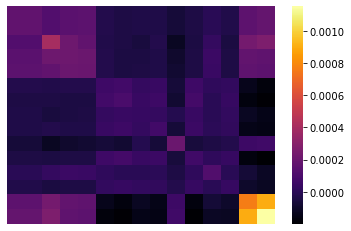

In [190]:
sns.heatmap(pd.DataFrame(cov_mini), annot=False, fmt='g', xticklabels=False, yticklabels=False, 
            cmap = 'inferno')